## 2016.6 ~ 2017.6 기간의 5-MA(Moving Average) 비트코인 가격 그래프와 이더리움 가격 그래프

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter

In [2]:
def to_yyyymmdd(date):
    y, m, d = date.split('-')
    if int(m) <= 12 and int(d) <= 12:
        m, d = d, m
        
    return f'{y}-{m}-{d}'

In [3]:
bitcoin = pd.read_csv('./BitCoin.csv')
bitcoin.Date = pd.to_datetime(bitcoin.Date.apply(to_yyyymmdd))
bitcoin = bitcoin.reindex(bitcoin.index[::-1])

bitcoin

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
1608,1608,2013-04-28,135.30,135.98,132.10,134.21,7.806648e+06,1500520000
1607,1607,2013-04-29,134.44,147.49,134.00,144.54,7.757951e+06,1491160000
1606,1606,2013-04-30,144.00,146.93,134.05,139.00,8.312655e+06,1597780000
1605,1605,2013-05-01,139.00,139.89,107.72,116.99,8.026719e+06,1542820000
1604,1604,2013-05-02,116.38,125.60,92.28,105.21,6.722784e+06,1292190000
...,...,...,...,...,...,...,...,...
4,4,2017-09-18,3591.09,4079.23,3591.09,4065.20,1.943210e+09,59514100000
3,3,2017-09-19,4073.79,4094.07,3868.87,3924.97,1.563980e+09,67520300000
2,2,2017-09-20,3916.36,4031.39,3857.73,3905.95,1.213830e+09,64918500000
1,1,2017-09-21,3901.47,3916.42,3613.63,3631.04,1.411480e+09,64677600000


In [4]:
ethereum = pd.read_csv('./ETH_day.csv')
ethereum.Date = pd.to_datetime(ethereum.Date)
ethereum = ethereum.reindex(ethereum.index[::-1])

ethereum

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
1437,2016-05-09,ETHUSD,12.00,12.00,9.36,9.98,1317.90,12885.06
1436,2016-05-10,ETHUSD,9.98,9.98,9.36,9.68,672.06,6578.20
1435,2016-05-11,ETHUSD,9.68,10.47,9.68,10.43,3052.51,30978.11
1434,2016-05-12,ETHUSD,10.43,12.00,9.92,10.20,2072.56,22183.39
1433,2016-05-13,ETHUSD,10.20,11.59,10.20,10.69,1769.71,18923.55
...,...,...,...,...,...,...,...,...
4,2020-04-11,ETHUSD,158.26,161.49,154.25,158.66,13761.72,2172914.57
3,2020-04-12,ETHUSD,158.66,165.37,155.21,158.56,12877.33,2082804.05
2,2020-04-13,ETHUSD,158.56,159.51,150.12,156.97,15698.32,2416728.28
1,2020-04-14,ETHUSD,156.97,162.15,155.74,158.61,18061.58,2872210.44


In [5]:
bitcoin['MA'] = bitcoin.Open.rolling(5).mean()
ethereum['MA'] = ethereum.Open.rolling(5).mean()

bitcoin_base_price = bitcoin.Open[bitcoin.Date == pd.Timestamp('2016-06-01')]
bitcoin['ROC'] = bitcoin.Open.apply(lambda x: x / bitcoin_base_price * 100 - 100)

ethereum_base_price = ethereum.Open[ethereum.Date == pd.Timestamp('2016-06-01')]
ethereum['ROC'] = ethereum.Open.apply(lambda x: x / ethereum_base_price * 100 - 100)

bitcoin = bitcoin[bitcoin.Date.between(pd.Timestamp('2016-06-01'), pd.Timestamp('2017-06-01'))]
ethereum = ethereum[ethereum.Date.between(pd.Timestamp('2016-06-01'), pd.Timestamp('2017-06-01'))]

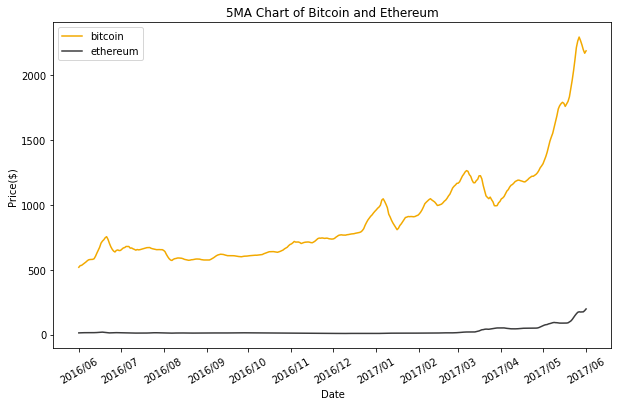

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(bitcoin.Date, bitcoin.MA, color='#f2a900', label='bitcoin')
plt.plot(ethereum.Date, ethereum.MA, color='#3c3c3d', label='ethereum')

# plt.xlim(pd.Timestamp('2016-06-01'), pd.Timestamp('2017-06-01'))
plt.gca().xaxis.set_major_locator(MonthLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y/%m'))
plt.xticks(rotation=30)

plt.xlabel('Date')
plt.ylabel('Price($)')
plt.title('5MA Chart of Bitcoin and Ethereum')

plt.legend()
plt.show()

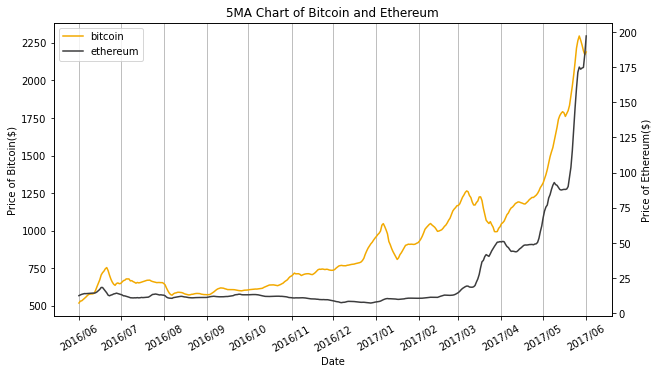

In [7]:
fig, bitcoin_ax = plt.subplots()
ethereum_ax = bitcoin_ax.twinx()
plt.title('5MA Chart of Bitcoin and Ethereum')
fig.autofmt_xdate(ha='center')
fig.set_size_inches(10, 6)

bitcoin_line = bitcoin_ax.plot(bitcoin.Date, bitcoin.MA, color='#f2a900', label='bitcoin')
ethereum_line = ethereum_ax.plot(ethereum.Date, ethereum.MA, color='#3c3c3d', label='ethereum')

# bitcoin_ax.set_xlim(pd.Timestamp('2016-06-01'), pd.Timestamp('2017-06-01'))
bitcoin_ax.xaxis.set_major_locator(MonthLocator())
bitcoin_ax.xaxis.set_major_formatter(DateFormatter('%Y/%m'))
bitcoin_ax.xaxis.grid(True)

# bitcoin_ax.set_ylim(bitcoin.Open.min(), bitcoin.Open.max())
# ethereum_ax.set_ylim(ethereum.Open.min(), ethereum.Open.max())

bitcoin_ax.set_xlabel('Date')
bitcoin_ax.set_ylabel('Price of Bitcoin($)')
ethereum_ax.set_ylabel('Price of Ethereum($)')

lines = bitcoin_line + ethereum_line
labels = [line.get_label() for line in lines]
bitcoin_ax.legend(lines, labels)
plt.show()

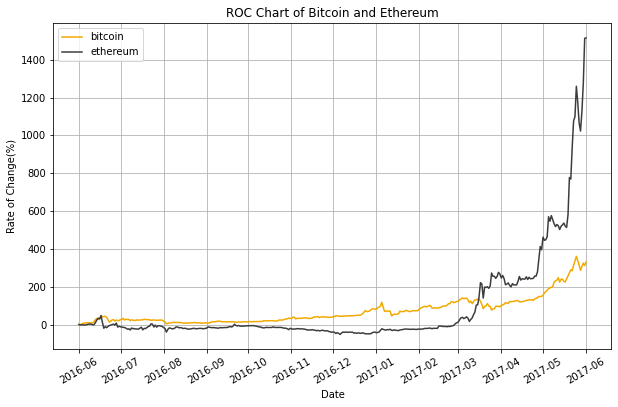

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(bitcoin.Date, bitcoin.ROC, color='#f2a900', label='bitcoin')
plt.plot(ethereum.Date, ethereum.ROC, color='#3c3c3d', label='ethereum')

# plt.xlim(pd.Timestamp('2016-06-01'), pd.Timestamp('2017-06-01'))
plt.gca().xaxis.set_major_locator(MonthLocator())
plt.gca().xaxis.grid(True)
plt.gca().yaxis.grid(True)
plt.xticks(rotation=30)

plt.xlabel('Date')
plt.ylabel('Rate of Change(%)')
plt.title('ROC Chart of Bitcoin and Ethereum')

plt.legend()
plt.show()

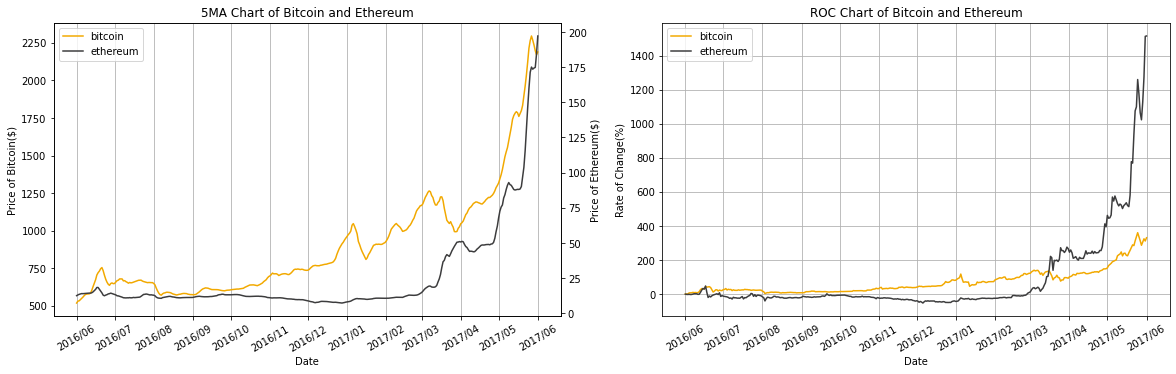

In [10]:
# MA Chart

fig = plt.figure()
fig.set_size_inches(20, 6)

bitcoin_ma_ax = fig.add_subplot(121)
ethereum_ma_ax = bitcoin_ma_ax.twinx()

bitcoin_ma_line = bitcoin_ma_ax.plot(bitcoin.Date, bitcoin.MA, color='#f2a900', label='bitcoin')
ethereum_ma_line = ethereum_ma_ax.plot(ethereum.Date, ethereum.MA, color='#3c3c3d', label='ethereum')

# bitcoin_ax.set_xlim(pd.Timestamp('2016-06-01'), pd.Timestamp('2017-06-01'))
bitcoin_ma_ax.xaxis.set_major_locator(MonthLocator())
bitcoin_ma_ax.xaxis.set_major_formatter(DateFormatter('%Y/%m'))
bitcoin_ma_ax.xaxis.grid(True)

bitcoin_ma_ax.set_title('5MA Chart of Bitcoin and Ethereum')
bitcoin_ma_ax.set_xlabel('Date')
bitcoin_ma_ax.set_ylabel('Price of Bitcoin($)')
ethereum_ma_ax.set_ylabel('Price of Ethereum($)')

ma_lines = bitcoin_ma_line + ethereum_ma_line
ma_labels = [l.get_label() for l in lines]
bitcoin_ma_ax.legend(lines, labels)


# ROC Chart

roc_ax = fig.add_subplot(122)
roc_ax.plot(bitcoin.Date, bitcoin.ROC, color='#f2a900', label='bitcoin')
roc_ax.plot(ethereum.Date, ethereum.ROC, color='#3c3c3d', label='ethereum')

roc_ax.xaxis.set_major_locator(MonthLocator())
roc_ax.xaxis.set_major_formatter(DateFormatter('%Y/%m'))
roc_ax.xaxis.grid(True)
roc_ax.yaxis.grid(True)

roc_ax.set_xlabel('Date')
roc_ax.set_ylabel('Rate of Change(%)')
roc_ax.set_title('ROC Chart of Bitcoin and Ethereum')

roc_ax.legend()

fig.autofmt_xdate(ha='center')
plt.show()